In [53]:
import pandas as pd
import gffpandas.gffpandas as gffpd
import gff3_parser

# Check how similar TE are using blast 

In [3]:
TE_gene = pd.read_csv('TransposableElementGene.tsv', sep = '\t', index_col=0)

In [4]:
TE_LTR = pd.read_csv('TE_LTR.tsv', sep = '\t')

In [5]:
TE_LTR = TE_LTR.set_index('Retrotransposon > Overlapping Features > Systematic Name')

In [6]:
TE_gene = TE_gene.join(TE_LTR [['Retrotransposon > Brief Description', 'Retrotransposon > Status']])

In [7]:
TE_gene.head()

,Transposable Element Gene > Standard Name,Transposable Element Gene > Name,Transposable Element Gene > Chromosome > Identifier,Transposable Element Gene > Feature Type,Transposable Element Gene > Length,Transposable Element Gene > Description,Transposable Element Gene > Brief Description,Transposable Element Gene > Sgd Alias,Transposable Element Gene > Status,Retrotransposon > Brief Description,Retrotransposon > Status
YAR009C,NaN,NaN,chrI,transposable element gene,3591,Retrotransposon TYA Gag and TYB Pol genes; Gag...,Retrotransposon TYA Gag and TYB Pol genes,truncated gag-pol fusion protein|YARCTyB1-1,Active,"Ty1 element, LTR retrotransposon of the Copia ...",Active
YAR010C,NaN,NaN,chrI,transposable element gene,1323,Retrotransposon TYA Gag gene co-transcribed wi...,Retrotransposon TYA Gag gene co-transcribed wi...,gag protein|YARCTyA1-1,Active,"Ty1 element, LTR retrotransposon of the Copia ...",Active
YBL005W-A,NaN,NaN,chrII,transposable element gene,1323,Retrotransposon TYA Gag gene co-transcribed wi...,Retrotransposon TYA Gag gene co-transcribed wi...,gag protein,Active,"Ty1 element, LTR retrotransposon of the Copia ...",Active
YBL005W-B,NaN,NaN,chrII,transposable element gene,5269,Retrotransposon TYA Gag and TYB Pol genes; tra...,Retrotransposon TYA Gag and TYB Pol genes,gag-pol fusion protein,Active,"Ty1 element, LTR retrotransposon of the Copia ...",Active
YBL100W-A,NaN,NaN,chrII,transposable element gene,1317,Retrotransposon TYA Gag gene co-transcribed wi...,Retrotransposon TYA Gag gene co-transcribed wi...,gag protein|TY2A_B|YBL101W-A,Active,"Ty2 element, LTR retrotransposon of the Copia ...",Active


In [8]:
blast_TE = pd.read_excel('blasted_TE.xlsx', index_col=0 )

In [9]:
TE_gene = TE_gene.join(blast_TE)

In [10]:
len(set(blast_TE.index) & set(TE_gene.index))

91

In [11]:
set(blast_TE.index) - set(TE_gene.index)

{'YCL074W', 'YIL082W'}

In [12]:
TE_gene[TE_gene.index == 'YCL074W']

,Transposable Element Gene > Standard Name,Transposable Element Gene > Name,Transposable Element Gene > Chromosome > Identifier,Transposable Element Gene > Feature Type,Transposable Element Gene > Length,Transposable Element Gene > Description,Transposable Element Gene > Brief Description,Transposable Element Gene > Sgd Alias,Transposable Element Gene > Status,Retrotransposon > Brief Description,Retrotransposon > Status,Chromosome,start,end,Homolgy to,Ty type,size


In [13]:
blast_TE[blast_TE.index == 'YCL074W']

,Chromosome,start,end,Homolgy to,Ty type,size
Gene,,,,,,
YCL074W,III,2824,"3750,",YGR038C-B,Ty1,Truncated
YCL074W,III,2824,"3750,",YDR034C-D,Ty2,Truncated
YCL074W,III,2824,"3750,",YPL060C-A,Ty4,Truncated


In [14]:
len(set(TE_gene.index) - set(blast_TE.index))

0

In [15]:
set(TE_gene.index) - set(blast_TE.index)

set()

In [16]:
blast_short = blast_TE[~blast_TE.index.duplicated(keep='first')]

In [17]:
blast_short.to_excel('blast_TE_no duplicates.xlsx')

In [18]:
blast_short['Homolgy to'].value_counts()

YGR038C-B    84
YPL060C-A     5
YGR109W-B     4
Name: Homolgy to, dtype: int64

In [19]:
truncated = blast_TE[blast_TE['size'] == 'Truncated']

In [20]:
truncated = truncated[~truncated.index.duplicated(keep='first')]
truncated['Homolgy to'].value_counts()

YGR038C-B    46
YPL060C-A    43
YGR109W-B     2
Name: Homolgy to, dtype: int64

In [21]:
blast_TE

,Chromosome,start,end,Homolgy to,Ty type,size
Gene,,,,,,
YGR038C-B,VII,566161,"562199,...",YGR038C-B,Ty1,Full
YPR137C-B,XVI,808963,"805001,...",YGR038C-B,Ty1,Full
YDR098C-B,IV,649820,"645858,6...",YGR038C-B,Ty1,Full
YPL257W-B,XVI,56748,"58052,58...",YGR038C-B,Ty1,Full
YLR157C-B,XII,480295,"476333,...",YGR038C-B,Ty1,Full
...,...,...,...,...,...,...
YBR012W-B,II,259869,"261173,2...",YPL060C-A,Ty4,Truncated
YGR161C-D,VII,821709,"817747,...",YPL060C-A,Ty4,Truncated
YDR261W-B,IV,981462,"982754,9...",YPL060C-A,Ty4,Truncated


# TE from liftoff v5

In [96]:
TE_lo = pd.read_excel('TE_liftoff_v5_yps1009.xlsx', index_col= 4)

In [98]:
TE_lo.drop(['Unnamed: 0'], axis=1, inplace=True)

In [99]:
TE_lo.shape

(95, 18)

In [100]:
TE_lo['length'] = TE_lo.apply(lambda x: x['end'] - x['start'], axis=1)

<AxesSubplot: >

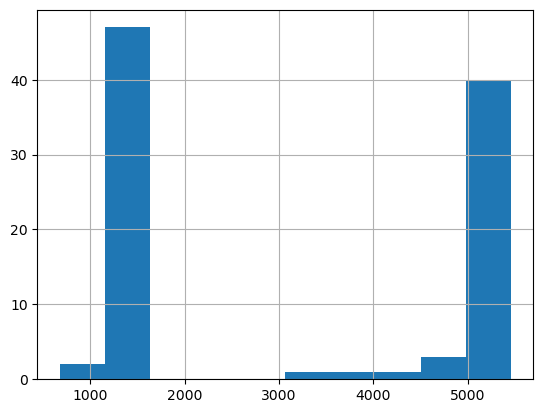

In [103]:
TE_lo['length'].hist()

# Blast TE

In [33]:
from Bio.Blast.Applications import NcbiblastnCommandline

# TE ultimate results and comparison

In [35]:
stats = pd.read_csv('Num_transposon_byclass.txt', sep = '\t')

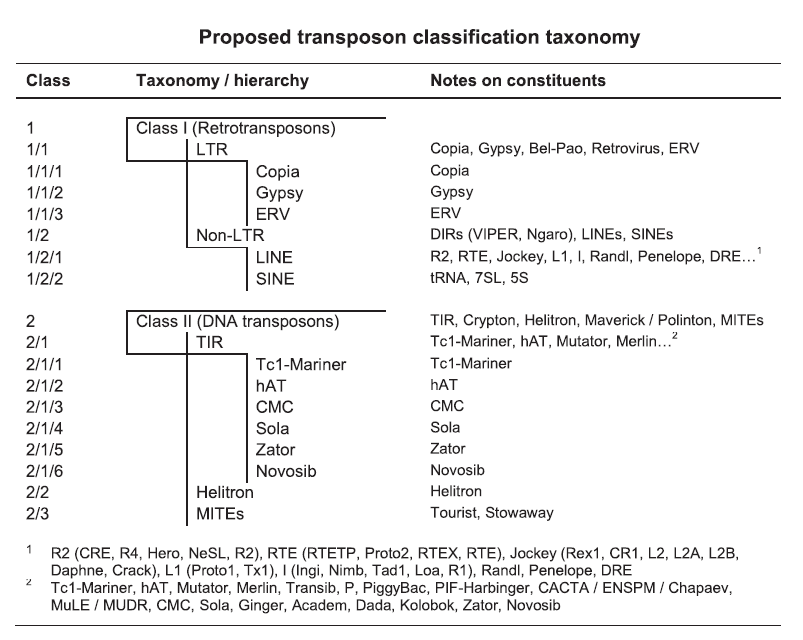

From this tale I think I only want to consider class 1 transposons 

In [36]:
stats

,SeqID,SeqName,all,1,1/1,1/1/1,1/1/2,1/1/3,1/2,1/2/1,...,2,2/1,2/1/1,2/1/2,2/1/3,2/1/4,2/1/5,2/1/6,2/2,2/3
all,all,255,57,57,20,37,0,0,0,0,...,196,42,26,15,12,99,2,0,2,NaN
seq1,chrII-2_tig00004927 reverse_complement,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
seq2,chrIII-2_tig00004935,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,NaN
seq3,chrIII_tig00004936,7,2,2,1,1,0,0,0,0,...,5,0,2,0,0,3,0,0,0,NaN
seq4,chrII_tig00000010 reverse_complement,13,4,4,1,3,0,0,0,0,...,9,1,0,0,1,7,0,0,0,NaN
seq5,chrI_tig00000033,9,2,2,2,0,0,0,0,0,...,7,0,3,3,0,1,0,0,0,NaN
seq6,chrIV_tig00000001,26,5,5,2,3,0,0,0,0,...,21,4,2,0,1,14,0,0,0,NaN
seq7,chrIX_tig00000023,7,1,1,1,0,0,0,0,0,...,4,0,0,0,0,4,0,0,2,NaN
seq8,chrMito_tig00000037 reverse_complement,22,0,0,0,0,0,0,0,0,...,22,11,0,1,4,6,0,0,0,NaN
seq9,chrVI-2_tig00004937 reverse_complement,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [54]:
full_data = gff3_parser.parse_gff3('finalResults/FinalAnnotations_Transposons.gff3',verbose = False,  parse_attributes=True)

In [55]:
full_data

,Seqid,Source,Type,Start,End,Score,Strand,Phase,description,class,transposon
0,seq11,reasonaTE,transposon,167690,169569,10:5,-,NaN,NaN,"1/1/2(Gypsy,LTR,Retrotransposon)",1
1,seq12,reasonaTE,transposon,345432,356391,9:5,-,NaN,NaN,"1/1/2(Gypsy,LTR,Retrotransposon)",2
2,seq12,reasonaTE,transposon,370165,389435,16:12,+,NaN,NaN,"1/1/2(Gypsy,LTR,Retrotransposon)",3
3,seq12,reasonaTE,transposon,590982,609289,9:14,-,NaN,NaN,"2/1/2(hAT,TIR,DNATransposon)",4
4,seq17,reasonaTE,transposon,10290,30010,6:5,-,NaN,NaN,"1/1/1(Copia,LTR,Retrotransposon)",5
...,...,...,...,...,...,...,...,...,...,...,...
250,seq6,reasonaTE,transposon,1303709,1309617,NaN,+,NaN,NaN,"1/1/1(Copia,LTR,Retrotransposon)",267
251,seq6,reasonaTE,transposon,1309286,1309617,NaN,+,NaN,NaN,"2/1/5(Zator,TIR,DNATransposon)",268
252,seq7,reasonaTE,transposon,192203,192551,NaN,+,NaN,NaN,"2/1/5(Zator,TIR,DNATransposon)",269
253,seq7,reasonaTE,transposon,381312,382575,NaN,+,NaN,NaN,"2/3(MITE,DNATransposon)",270


In [56]:
full_data['class'].value_counts()

2/1/5(Zator,TIR,DNATransposon)          99
2/1/1(Tc1-Mariner,TIR,DNATransposon)    42
1/1/2(Gypsy,LTR,Retrotransposon)        37
2/1/2(hAT,TIR,DNATransposon)            26
1/1/1(Copia,LTR,Retrotransposon)        20
2/1/3(CMC,TIR,DNATransposon)            15
2/1/4(Sola,TIR,DNATransposon)           12
2/1/6(Novosib,TIR,DNATransposon)         2
2/3(MITE,DNATransposon)                  2
Name: class, dtype: int64

In [57]:
LTR = full_data[full_data['class'].isin(['1/1/2(Gypsy,LTR,Retrotransposon)', '1/1/1(Copia,LTR,Retrotransposon)'])]

In [88]:
LTR.set_index('Seqid', inplace=True)

In [59]:
LTR.shape

(57, 11)

In [85]:
Latin_to_arabic = {'I': 1, 'II':2, 'III':3, 'IV':4, 'V':5, 'VI':6, 'VII':7, 'VIII':8, 'IX':9, 'X':10,
                'XI':11, 'XII':12, 'XIII':13, 'XIV':14, 'XV':15, 'XVI':16, 'Mito': 'mitoch', 'MANY': 7}
import re 
seq_to_chr = {'Seqid':[], 'chromosome':[], 'contig': []}
with open('sequence_heads.txt', 'r') as file:
    for line in file:
        line = line.replace('>', '')
        seq, contig = line.split('\t')
        seq_to_chr['Seqid'] = seq_to_chr['Seqid'] + [seq]
        seq_to_chr['contig'] = seq_to_chr['contig'] + [contig.strip('\n')]
        temp = re.split('_', contig)
        chrom = temp[0].replace('chr', '')
        if '-' in chrom:
            chrom, e = chrom.split('-')
        seq_to_chr['chromosome'] = seq_to_chr['chromosome'] + [Latin_to_arabic[chrom]]

In [86]:
seq_heads = pd.DataFrame.from_dict(seq_to_chr)

In [87]:
seq_heads.set_index('Seqid', inplace=True)

In [89]:
LTR.shape

(57, 10)

In [90]:
LTR = LTR.join(seq_heads)

In [106]:
LTR.shape

(57, 12)

In [95]:
LTR_count = LTR['chromosome'].value_counts().to_frame()

In [105]:
LTR_count.sort_index()

,chromosome
1,2
2,5
3,2
4,5
5,4
6,2
7,8
8,8
9,1
10,4


# TO DO
For every LTR identified, blastx sequence against s288c. And find our if one or 2 proteins produced.
can be double checked by looking at snapgene.


In [120]:
LTR = LTR.sort_values(by=['chromosome', 'Start'])

In [121]:
LTR

,Source,Type,Start,End,Score,Strand,Phase,description,class,transposon,chromosome,contig
Seqid,,,,,,,,,,,,
seq5,reasonaTE,transposon,1411,7774,89.5,+,NaN,,"1/1/1(Copia,LTR,Retrotransposon)",41,1,chrI_tig00000033
seq5,reasonaTE,transposon,177545,183500,100.0,+,NaN,,"1/1/1(Copia,LTR,Retrotransposon)",43,1,chrI_tig00000033
seq1,reasonaTE,transposon,1,10216,NaN,+,NaN,NaN,"1/1/2(Gypsy,LTR,Retrotransposon)",224,2,chrII-2_tig00004927 reverse_complement
seq4,reasonaTE,transposon,185087,191046,100.0,+,NaN,,"1/1/1(Copia,LTR,Retrotransposon)",39,2,chrII_tig00000010 reverse_complement
seq4,reasonaTE,transposon,387742,387940,NaN,+,NaN,NaN,"1/1/2(Gypsy,LTR,Retrotransposon)",255,2,chrII_tig00000010 reverse_complement
seq4,reasonaTE,transposon,409390,411934,87.98,+,NaN,,"1/1/2(Gypsy,LTR,Retrotransposon)",40,2,chrII_tig00000010 reverse_complement
seq4,reasonaTE,transposon,85096,89531,7:7,+,NaN,NaN,"1/1/2(Gypsy,LTR,Retrotransposon)",13,2,chrII_tig00000010 reverse_complement
seq3,reasonaTE,transposon,136492,151821,96.21,+,NaN,,"1/1/1(Copia,LTR,Retrotransposon)",35,3,chrIII_tig00004936
seq3,reasonaTE,transposon,142458,151273,NaN,+,NaN,NaN,"1/1/2(Gypsy,LTR,Retrotransposon)",219,3,chrIII_tig00004936


In [122]:
LTR.to_excel('LTR_final_ResonaTE_to_annotate.xlsx')